# Jupyter Notebook Guide: Using the Ensemble Class

This guide provides a detailed explanation of how to use the Ensemble class. The Ensemble class is designed to manage multiple DataStream objects and perform statistical analysis, uncertainty estimation, and ensemble-level computations.

Each function is explained before being demonstrated in code cells.



### Features:
- **Trimming**: Identifies steady-state regions in data.
- **Statistical Analysis**: Computes mean, standard deviation, confidence intervals, and cumulative statistics.
- **Stationarity Testing**: Uses the Augmented Dickey-Fuller test.
- **Effective Sample Size (ESS)**: Estimates the independent sample size.


## 1. Import Required Libraries

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Path to the "src/quends" directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../../src/quends'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Now we can import DataStream
import quends as qnds

## 2.  Load Data into an Ensemble Object

An Ensemble object is initialized with a list of DataStream instances.
Which can be initialized with a **Pandas DataFrame, netcdf, numpy arrays, csv files, json**.


In [4]:
# Example: Load data for each ensemble member (using CSV as an example)
# Specify the file paths
ma = "gx/ensemble/tprim_2_5_a.out.csv" 
mb = "gx/ensemble/tprim_2_5_b.out.csv"  
mc = "gx/ensemble/tprim_2_5_c.out.csv" 
md = "gx/ensemble/tprim_2_5_d.out.csv" 
 
file_paths = [ma, mb, mc,md]


# Create a list of DataStream objects from CSV files
data_streams = [qnds.from_csv(file_path) for file_path in file_paths]

# Create an Ensemble instance from the list of DataStream objects
ensemble = qnds.Ensemble(data_streams)

## 3. Basic Data Exploration
### 3.1 Exploring the Ensemble

In [5]:
from IPython.display import display

# Get the list of ensemble members
members = ensemble.members()
print("Ensemble members:", members)

# Print the number of members
print("Number of ensemble members:", len(ensemble))

# Show a preview (first 5 rows) of each member as a DataFrame
for i, head_df in ensemble.head(5).items():
    print(f"Member {i} preview:")
    display(head_df)

#summary_info = ensemble.summary()
#summary_info

Ensemble members: [<quends.base.data_stream.DataStream object at 0x13dc05340>, <quends.base.data_stream.DataStream object at 0x13e6d64b0>, <quends.base.data_stream.DataStream object at 0x13e69f8f0>, <quends.base.data_stream.DataStream object at 0x13e9f1970>]
Number of ensemble members: 4
Member 0 preview:


,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.020072,0.000322,1.014122e-06,5.556982e-15,1.283244e-17,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.513479e-11,-1.238711e-14,0.000000e+00,0.0,-1.328687e-12
1,2.027322,0.000236,9.462429e-07,1.035192e-05,3.763393e-17,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.326710e-12,-1.907196e-13,-2.302137e-12,0.0,-1.325463e-12
2,4.034571,0.000198,1.138735e-06,9.805337e-06,1.168341e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.022337e-12,-2.190608e-13,-1.575239e-12,0.0,-4.890709e-13
3,6.041821,0.000206,1.060234e-06,9.191237e-06,2.735980e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.022327e-11,-3.670521e-13,-1.553083e-13,0.0,-8.325619e-13
4,8.049070,0.000245,1.066248e-06,1.006626e-05,1.340230e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.445467e-11,-5.255198e-14,2.001172e-12,0.0,-6.776345e-13


Member 1 preview:


,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.020072,0.000337,9.478008e-07,5.498414e-15,2.938486e-17,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-6.058203e-11,-3.913558e-13,0.000000e+00,0.0,-8.621885e-13
1,2.027322,0.000246,1.030577e-06,9.592892e-06,1.704418e-16,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.018197e-12,-4.284778e-13,2.154716e-13,0.0,-1.163910e-12
2,4.034571,0.000205,1.178075e-06,9.399883e-06,7.256676e-17,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4.306016e-12,1.547099e-13,-8.255308e-13,0.0,-4.412697e-13
3,6.041821,0.000214,1.236560e-06,1.102992e-05,1.428161e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.005641e-12,-2.837396e-13,1.692135e-12,0.0,-9.093148e-13
4,8.049070,0.000255,1.218287e-06,1.046567e-05,4.379540e-17,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-7.825188e-12,-1.594522e-13,5.201094e-13,0.0,-1.740464e-12


Member 2 preview:


,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.020072,0.000328,1.102121e-06,6.271368e-15,4.807826e-17,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-5.254803e-11,-1.669372e-13,0.000000e+00,0.0,-8.094992e-13
1,2.027322,0.000238,9.881292e-07,9.244264e-06,2.051629e-16,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-5.920675e-12,1.062050e-13,4.563825e-13,0.0,-3.227647e-13
2,4.034571,0.000198,9.619108e-07,9.829564e-06,1.363751e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.314390e-12,-7.750980e-14,1.148845e-13,0.0,-1.811633e-13
3,6.041821,0.000205,1.170043e-06,1.087192e-05,6.595944e-17,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.704185e-12,-3.690557e-13,-1.701298e-12,0.0,-6.034650e-13
4,8.049070,0.000244,1.336747e-06,1.020988e-05,7.392368e-17,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.510678e-11,-7.399241e-13,-2.210004e-12,0.0,-8.854238e-13


Member 3 preview:


,time,Phi2_t,Phi2_kxt,Phi2_kyt,Phi2_kxkyt,Phi2_zt,Apar2_t,Apar2_kxt,Apar2_kyt,Apar2_kxkyt,...,ParticleFlux_st,ParticleFlux_kxst,ParticleFlux_kyst,ParticleFlux_kxkyst,ParticleFlux_zst,TurbulentHeating_st,TurbulentHeating_kxst,TurbulentHeating_kyst,TurbulentHeating_kxkyst,TurbulentHeating_zst
0,0.020072,0.000339,9.618830e-07,6.593556e-15,1.174169e-16,0.000004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-6.156273e-11,2.354903e-13,0.000000e+00,0.0,4.674595e-13
1,2.027322,0.000247,1.052545e-06,1.114283e-05,1.037530e-16,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.087938e-11,-9.434659e-14,-1.457159e-12,0.0,-4.606122e-13
2,4.036604,0.000206,1.080670e-06,1.115219e-05,8.383192e-17,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-9.205883e-13,-4.194983e-13,-4.603764e-13,0.0,-2.225860e-12
3,6.045098,0.000215,1.184889e-06,9.469807e-06,4.234651e-17,0.000005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.167256e-12,-4.235090e-13,-1.888268e-12,0.0,-1.044459e-12
4,8.052347,0.000257,1.290768e-06,1.055897e-05,2.060653e-17,0.000006,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-8.038509e-12,1.660432e-13,-1.551148e-12,0.0,-1.187304e-12


## 4. Data Processing

### 4.1 Stationarity Check

The is_stationary() method checks whether the specified columns in the data stream are stationary by performing the Augmented Dickey-Fuller (ADF) test.

In [6]:
# Check stationarity for 'Wg_st', 'Wphi_st', 'HeatFlux_st'
stationarity_results = ensemble.is_stationary(['Wg_st', 'Wphi_st', 'HeatFlux_st'])
print("Stationarity results:")
for member, result in stationarity_results.items():
    print(f"{member}: {result}")

Stationarity results:
Member 0: {'Wg_st': True, 'Wphi_st': True, 'HeatFlux_st': True}
Member 1: {'Wg_st': True, 'Wphi_st': True, 'HeatFlux_st': True}
Member 2: {'Wg_st': True, 'Wphi_st': True, 'HeatFlux_st': True}
Member 3: {'Wg_st': True, 'Wphi_st': True, 'HeatFlux_st': True}


### 4.2 Trimming data based to obtain steady-state portion

The trim() method trims the data of each member based on a steady-state detection method and returns an ensemble with the trimmed members.

Expected Output:
- Returns a new Ensemble with trimmed members or None if no members could be trimmed.

In [7]:
# Now trim each ensemble member based on 'HeatFlux_st'
trimmed_ensemble = ensemble.trim('HeatFlux_st', window_size=30, start_time=0.0, method="rolling_variance")

if trimmed_ensemble is not None:
    print("Trimmed ensemble summary:")
    trimmed_ensemble.summary()
else:
    print("Trimming unsuccessful for all ensemble members.")

Trimmed ensemble summary:
Ensemble Summary:
Number of ensemble members: 4
Common variables: ['HeatFlux_st']

Member 0:
  Number of samples: 121
  Columns: ['time', 'HeatFlux_st']
  Head:
         time  HeatFlux_st
0  160.600022     8.699987
1  162.607271     8.852156
2  164.614520     8.883341
3  166.621770     8.713289
4  168.629019     8.625758

Member 1:
  Number of samples: 134
  Columns: ['time', 'HeatFlux_st']
  Head:
         time  HeatFlux_st
0  134.505780     8.748699
1  136.513029     8.617069
2  138.520279     8.451221
3  140.527528     8.251635
4  142.534777     8.171383

Member 2:
  Number of samples: 136
  Columns: ['time', 'HeatFlux_st']
  Head:
         time  HeatFlux_st
0  130.491281     8.988642
1  132.498530     8.904222
2  134.505780     8.849459
3  136.513029     8.799004
4  138.520279     8.851170

Member 3:
  Number of samples: 124
  Columns: ['time', 'HeatFlux_st']
  Head:
         time  HeatFlux_st
0  154.588304     6.745999
1  156.595553     6.629928
2  158.60

### 4.3 Steady state start plot

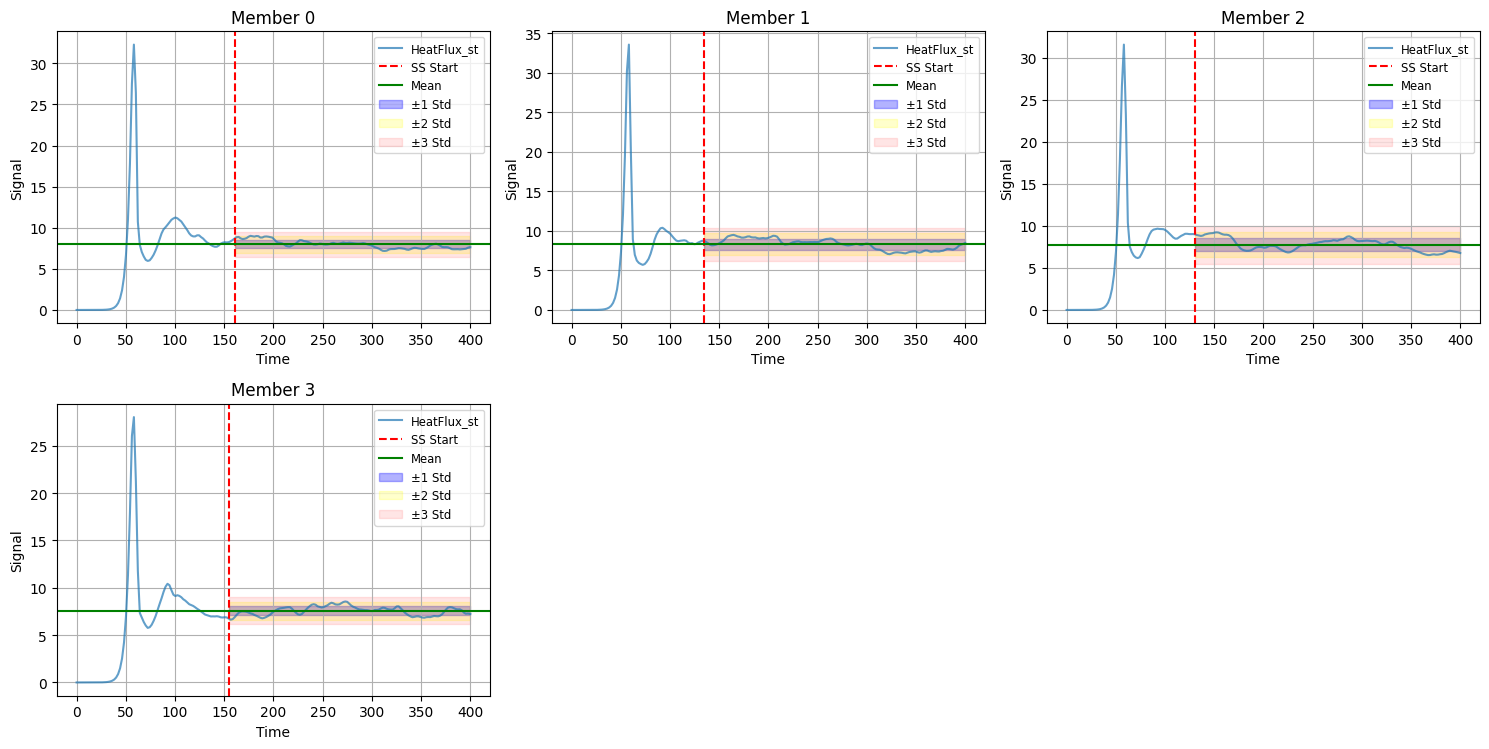

In [11]:
# Create a Plotter instance
plotter = qnds.Plotter()

# Example: Call the automatic steady state plot function for the ensemble.
# This function will attempt to automatically determine the steady state for each variable.
plotter.ensemble_steady_state_automatic_plot(
    ensemble_obj=ensemble,
    variables_to_plot=["HeatFlux_st"],
    window_size=30,
    start_time=0.0,
    method="rolling_variance",
    save=False
)

### 4.4 Autocorrelation Plot

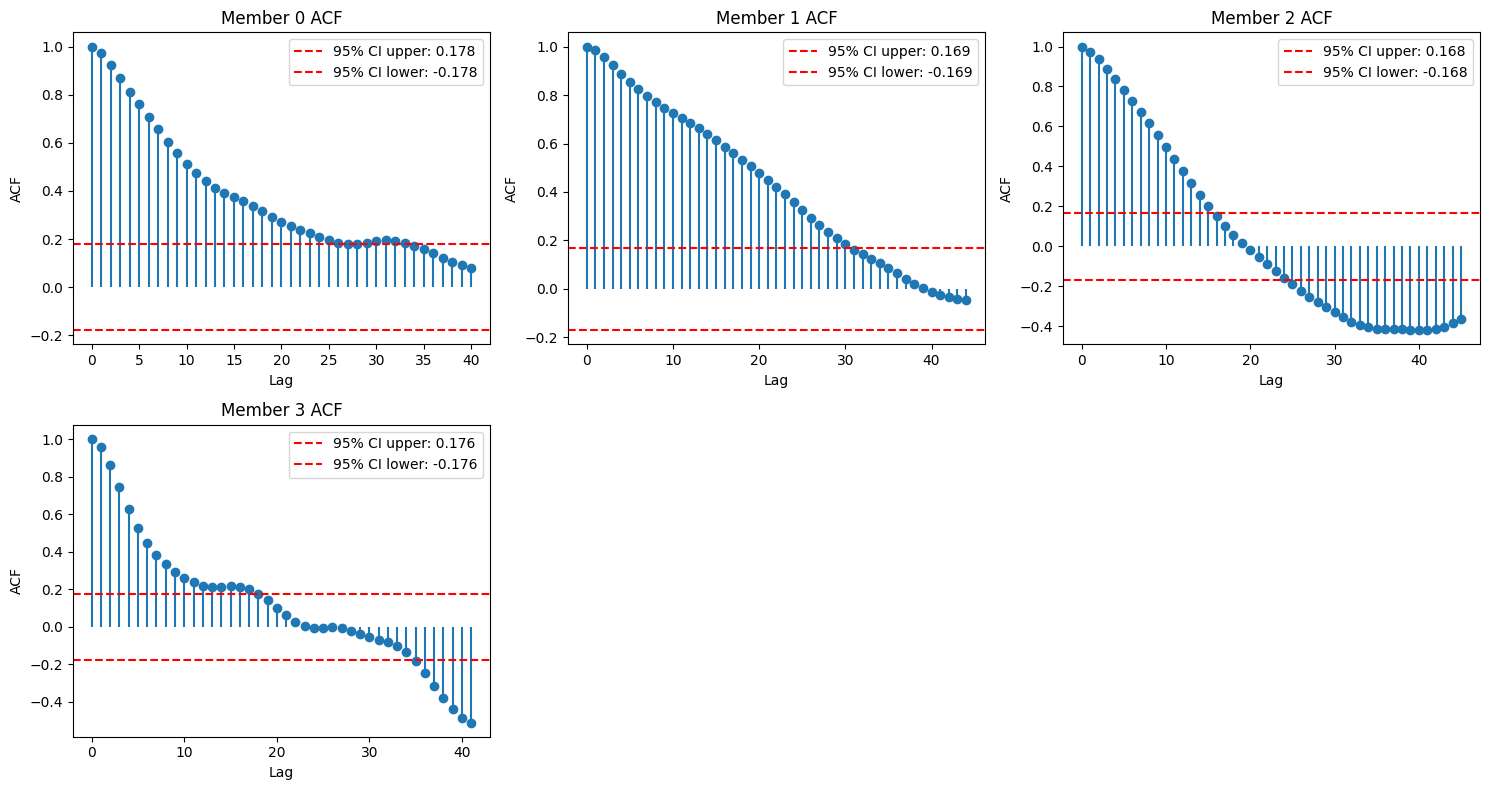

In [12]:
plotter=qnds.Plotter()
#plotter.trace_plot(ensemble,["HeatFlux_st"])

plotter.plot_acf_ensemble(trimmed_ensemble)

### 4.5 Esimating Effective Sample Size

The ESS can be computed using the following formula:


$$ESS = \frac{n}{1 + 2 \sum_{k=1}^{K} \rho(k)}$$
Where:
- $n$ is the total sample size.
- $\rho(k)$ is the autocorrelation at lag $k$.
- $K$ is a truncation point where $\rho(k)$ is considered small enough to be considered ignored (insignificant)

In [13]:
# Compute effective sample size for 'Wg_st', 'Wphi_st', 'HeatFlux_st'
ess_results = trimmed_ensemble.effective_sample_size()
print("\nEffective Sample Size results:")
for member, result in ess_results.items():
    print(f"{member}: {result}")


Effective Sample Size results:
Member 0: {'HeatFlux_st': 5}
Member 1: {'HeatFlux_st': 4}
Member 2: {'HeatFlux_st': 6}
Member 3: {'HeatFlux_st': 9}


## 5. Ensemble Statistical Analysis

In [14]:
import pandas as pd

def flatten_ensemble_result(result, metric):
    """
    Flatten an ensemble result dictionary for a given metric into two DataFrames.
    
    The input 'result' is expected to have the following structure:
      {
         "Member Ensemble": { variable: { metric: value, ... }, ... },
         "Individual Members": {
             "Member 0": { variable: { metric: value, ... }, ... },
             "Member 1": { ... },
             ...
         }
      }
    
    This function returns two DataFrames:
      - ensemble_df: One row per variable from the aggregated ensemble results.
      - individual_df: Rows for each member, columns for each variable, with values given by the specified metric.
    
    Args:
        result (dict): The ensemble result dictionary.
        metric (str): The key within each variable's dict to extract (e.g., "mean", "mean uncertainty").
        
    Returns:
        tuple: (ensemble_df, individual_df)
    """
    # Extract and convert the aggregated (ensemble) results.
    ensemble_dict = result.get("Member Ensemble", {})
    # Each key in ensemble_dict corresponds to a variable.
    ensemble_df = pd.DataFrame(ensemble_dict).T  # Transpose so that each row is a variable.
    
    # Extract individual member results.
    individual = result.get("Individual Members", {})
    # For each member, extract the specified metric for each variable.
    ind_data = {}
    for member, metrics in individual.items():
        ind_data[member] = {var: metrics[var][metric] for var in metrics if metric in metrics[var]}
    individual_df = pd.DataFrame(ind_data).T  # Rows = members, columns = variables.
    
    return ensemble_df, individual_df


import pandas as pd

def flatten_ci_result(result):
    """
    Flatten the confidence interval results into two DataFrames:
      - One for the aggregated (Member Ensemble) results.
      - One for the Individual Members results.
    
    The input 'result' is expected to be a dictionary with keys:
      "Member Ensemble" and "Individual Members".
    The values may be tuples or dictionaries; this function converts tuples to strings.
    
    Returns:
        tuple: (ensemble_ci_df, individual_ci_df)
    """
    # Process aggregated (ensemble) confidence intervals.
    ensemble_ci = result.get("Member Ensemble", {})
    flattened_ensemble = {}
    # In Technique 1, the ensemble CI is stored as {variable: (lower, upper)}
    for var, val in ensemble_ci.items():
        if isinstance(val, tuple):
            flattened_ensemble[var] = str(val)
        elif isinstance(val, dict):
            # If for some reason it's a dictionary, flatten it.
            flattened_ensemble[var] = {k: str(v) if isinstance(v, tuple) else v for k, v in val.items()}
        else:
            flattened_ensemble[var] = val

    # Create a DataFrame with one row (transposed to have variables as rows).
    ensemble_ci_df = pd.DataFrame(flattened_ensemble, index=[0]).T
    ensemble_ci_df.columns = ["Confidence Interval"]

    # Process individual member CIs.
    individual_ci = result.get("Individual Members", {})
    flattened_individual = {}
    for member, metrics in individual_ci.items():
        # Each metrics should be a dict mapping variable -> tuple.
        flattened_individual[member] = {var: str(val) if isinstance(val, tuple) else val 
                                         for var, val in metrics.items()}
    individual_ci_df = pd.DataFrame(flattened_individual).T
    
    return ensemble_ci_df, individual_ci_df

### 5.1 Computing the Mean 
The mean() method computes the mean for the ensemble. It can aggregate data using different techniques:


- Technique 1: Aggregated raw data from members.
- **Technique 2: Weighted mean based on processed short-term averages length (still being debugged).**

Expected Output:
- Returns individual member means and the aggregated mean for the ensemble.

In [15]:
mean_result = trimmed_ensemble.mean(method="non-overlapping", window_size=10, technique=1)
# Flatten the "mean" results.
ensemble_mean_df, individual_mean_df = flatten_ensemble_result(mean_result, "mean")
print("Member Ensemble Mean:")
print(ensemble_mean_df)
print("\nIndividual Member Means:")
print(individual_mean_df)

Member Ensemble Mean:
                 mean
HeatFlux_st  7.901853

Individual Member Means:
          HeatFlux_st
Member 0     7.972442
Member 1     8.290231
Member 2     7.755673
Member 3     7.590845


### 5.2 Computing the Mean  Uncertainty

The mean_uncertainty() method computes the uncertainty (standard error) of the mean for each ensemble member using different techniques:

- Technique 1: Aggregated raw data from members.
- **Technique 2: Weighted mean based on processed short-term averages length (still being debugged).**

Expected Output:

- Returns a dictionary with individual member uncertainties and the ensemble's weighted uncertainty.


In [16]:
unc_result = trimmed_ensemble.mean_uncertainty(method="non-overlapping", window_size=10, technique=1)

# Flatten the "mean uncertainty" results.
ensemble_unc_df, individual_unc_df = flatten_ensemble_result(unc_result, "mean uncertainty")
print("\nMember Ensemble Mean Uncertainty:")
print(ensemble_unc_df)
print("\nIndividual Member Mean Uncertainties:")
print(individual_unc_df)


Member Ensemble Mean Uncertainty:
                                                        HeatFlux_st
mean_uncertainty          {'mean uncertainty': 0.04036442981759393}
mean_uncertainty_average                                   0.072156

Individual Member Mean Uncertainties:
          HeatFlux_st
Member 0     0.061897
Member 1     0.086763
Member 2     0.086691
Member 3     0.053271


### 5.3 Estimate confidence interval


The confidence_interval() method computes the confidence interval for the mean (of short-term averages) of the ensemble using the individual member's mean and uncertainty.

Expected Output:
- Returns confidence intervals for each member and the ensemble.

In [17]:
ci_result = trimmed_ensemble.confidence_interval(method="non-overlapping", window_size=10, technique=1)
# (we can similarly do for compute_statistics.)

# Assume ci_result is a dictionary from ensemble.confidence_interval(..., technique=1)
ensemble_ci_df, individual_ci_df = flatten_ci_result(ci_result)

print("Member Ensemble Confidence Intervals:")
print(ensemble_ci_df)

print("\nIndividual Member Confidence Intervals:")
print(individual_ci_df)



Member Ensemble Confidence Intervals:
                               Confidence Interval
HeatFlux_st  (7.822738379612852, 7.98096694449782)

Individual Member Confidence Intervals:
                                      HeatFlux_st
Member 0  (7.8511245418926325, 8.093759347393084)
Member 1   (8.120174387616482, 8.460286879367649)
Member 2  (7.5857576986495365, 7.925587747600464)
Member 3   (7.486432823030314, 7.695256218693824)
